In [2]:
import pandas as pd
import numpy as np 
import sys 
from bertopic_mapper import merge_and_process
import matplotlib.pyplot as plt
import seaborn as sns
from ssl_data_transformers import PreprocessingPipeline
from lazy_predict_runner import LazyPredictPipeline
sys.path.append("../")
from plotting_utils import save_figure

### Check the distributions etc for the labeled subset of the data after using BERTopic

In [25]:
# docs_topics = './data/categorized_topic_doc_neighbors_15_cluster_50_samples_5_topic_size_500_vol_2.csv'
# all_data = './data/processed_data_all_vol_2.csv'

In [26]:
# merge_and_process(docs_topics, all_data)

In [27]:
# df_bertopic = pd.read_csv('./data/processed_data_all_bertopic_vol_2.csv')

# # change dtype of category to string in df_bertopic
# df_bertopic['category'] = df_bertopic['category'].astype(str)

#### Checks

In [30]:
### Check with manually labelled subset whether bertopic is correct

# # display data with category different than '-1'
# df_check = df_bertopic[df_bertopic['category'] != '-1']
# # return rows for which category is not equal to categoty_bertopic
# df_check = (df_check[df_check['category'] != df_check['category_bertopic']])

# # return rows for whichi category_bertopic is not '-1'
# df_check = df_check[df_check['category_bertopic'] != '-1']
# df_check

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,topic,category_bertopic
783,3135000351,rubber plug,3,1,2014,1,610615,372067.91,0.00,SE,25,39,B,0.61,RUBBER PLUG ...,36,C
13292,9613095209,seal ring lower epdm dn mixproof ht,3,1,2021,2,47265,217452.44,0.01,CN,29,53,B,4.60,SEAL RING LOWER EPDM 63.5-76.1/DN65-80 UNIQUE ...,70,C
19733,9613414101,plug air release,1,2,2014,1,315306,11885.48,0.00,CN,43,80,B,0.04,PLUG FOR AIR RELEASE ...,36,C


Small fix - Overwrite category_bertopic with category (if category not equal to -1)

In [31]:
# replace 'category_bertopic' value with 'category' value if 'category' is not equal to '-1' 
# df_bertopic['category_bertopic'] = np.where(df_bertopic['category'] != '-1', df_bertopic['category'], df_bertopic['category_bertopic'])

In [80]:
# check row with prodict_id 9613414101	
# df_bertopic[df_bertopic['product_id'] == '9613414101']

In [34]:
# df_bertopic.to_csv('./data/processed_data_all_bertopic_vol_2.csv', index=False)

In [4]:
df_bertopic = pd.read_csv('./data/processed_data_all_bertopic_vol_2.csv')

In [5]:
df_bertopic.head()

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,topic,category_bertopic
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.12,DK,1,1,-1,38.82,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",-1,-1
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.26,CO,1,1,-1,8.87,"C24FCF-1-SFY-S BOLTED HANGER, N...",-1,-1
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.28,CO,1,1,-1,6.16,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",-1,-1
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.32,SE,2,2,-1,7.05,"C24FCF-2-SFY-S BOLTED HANGER, N...",-1,-1
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.36,CO,2,2,-1,7.80,"C24FCF-3-SFY-S BOLTED HANGER, N...",-1,-1


##### Split data into labelled and unlabelled

In [52]:
# only the data that has been categorized by bertopic
df_bertopic_labeled = df_bertopic[df_bertopic['category_bertopic'] != '-1']

# only the data that has not been categorized by bertopic
df_bertopic_unlabeled = df_bertopic[df_bertopic['category_bertopic'] == '-1']

#### Subset to validate with stakeholders

In [53]:
df_bertopic_labeled['category_bertopic'].value_counts()

category_bertopic
C    12223
A     2503
B     2031
E      221
D       60
Name: count, dtype: int64

In [54]:
len(df_bertopic_labeled)

17038

Sample for validation with stakeholders

In [55]:
# take 30 random samples from each bertopic category
df_bertopic_labeled_sample = df_bertopic_labeled.groupby('category_bertopic').apply(lambda x: x.sample(n=30, random_state=42)).reset_index(drop=True)

In [56]:
# drop columns from df_bertopic_labeled_sample expect for product_id, original_description, category_bertopic
df_bertopic_labeled_sample = df_bertopic_labeled_sample[['product_id', 'description_original', 'category_bertopic']]

In [57]:
df_bertopic_labeled_sample.to_csv('./data/processed_data_all_bertopic_labeled_sample_vol_2.csv', index=False)

### EDA

In [58]:
# display he count for each category_bertopic
df_bertopic['category_bertopic'].value_counts()

category_bertopic
-1    17093
C     12223
A      2503
B      2031
E       221
D        60
Name: count, dtype: int64

In [59]:
# sum of products with label different than '-1' (i.e. categorized by bertopic)
df_bertopic_labeled['category_bertopic'].value_counts().sum()

17038

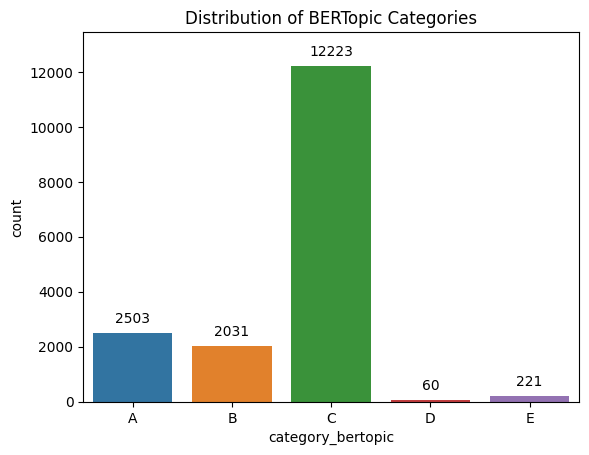

In [60]:
# Set order for categories
order = sorted(df_bertopic_labeled['category_bertopic'].unique())

ax = sns.countplot(data=df_bertopic_labeled, x='category_bertopic', order=order)
plt.title('Distribution of BERTopic Categories')

# Add counts on top of the bars
for p in ax.patches:
    height = int(p.get_height())  # Convert to integer
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10),  # Adjust this value to move label position
                textcoords='offset points')

# Adjust the ylim to fit the annotations
ax.set_ylim(0, 1.1*df_bertopic_labeled['category_bertopic'].value_counts().max())

# Save the figure using your function
save_figure(plt.gcf(), 'bertopic_labeled_category_distribution')

plt.show()

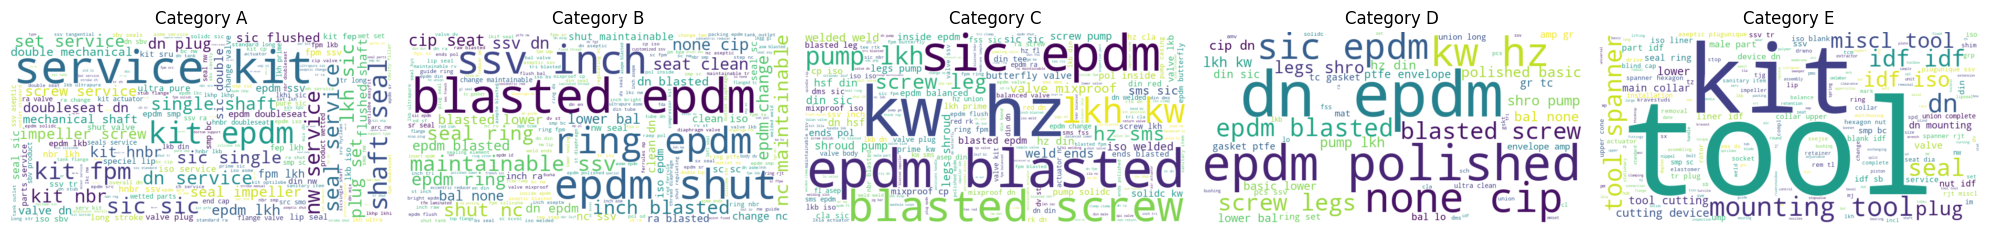

In [63]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' with 'description' and 'category_bertopic' columns.
# Replace this with your actual DataFrame loading method.
# df = pd.read_csv('your_file.csv')

# Define the categories you're interested in
categories = ['A', 'B', 'C', 'D', 'E']

# Set up the plot grid
fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the size as needed

for i, category in enumerate(categories):
    # Filter the DataFrame for the category
    category_text = " ".join(df_bertopic_labeled.loc[df_bertopic_labeled['category_bertopic'] == category, 'description'].astype(str))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(category_text)
    
    # Plot
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Category {category}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

#### Boxplots with numerical features distributions

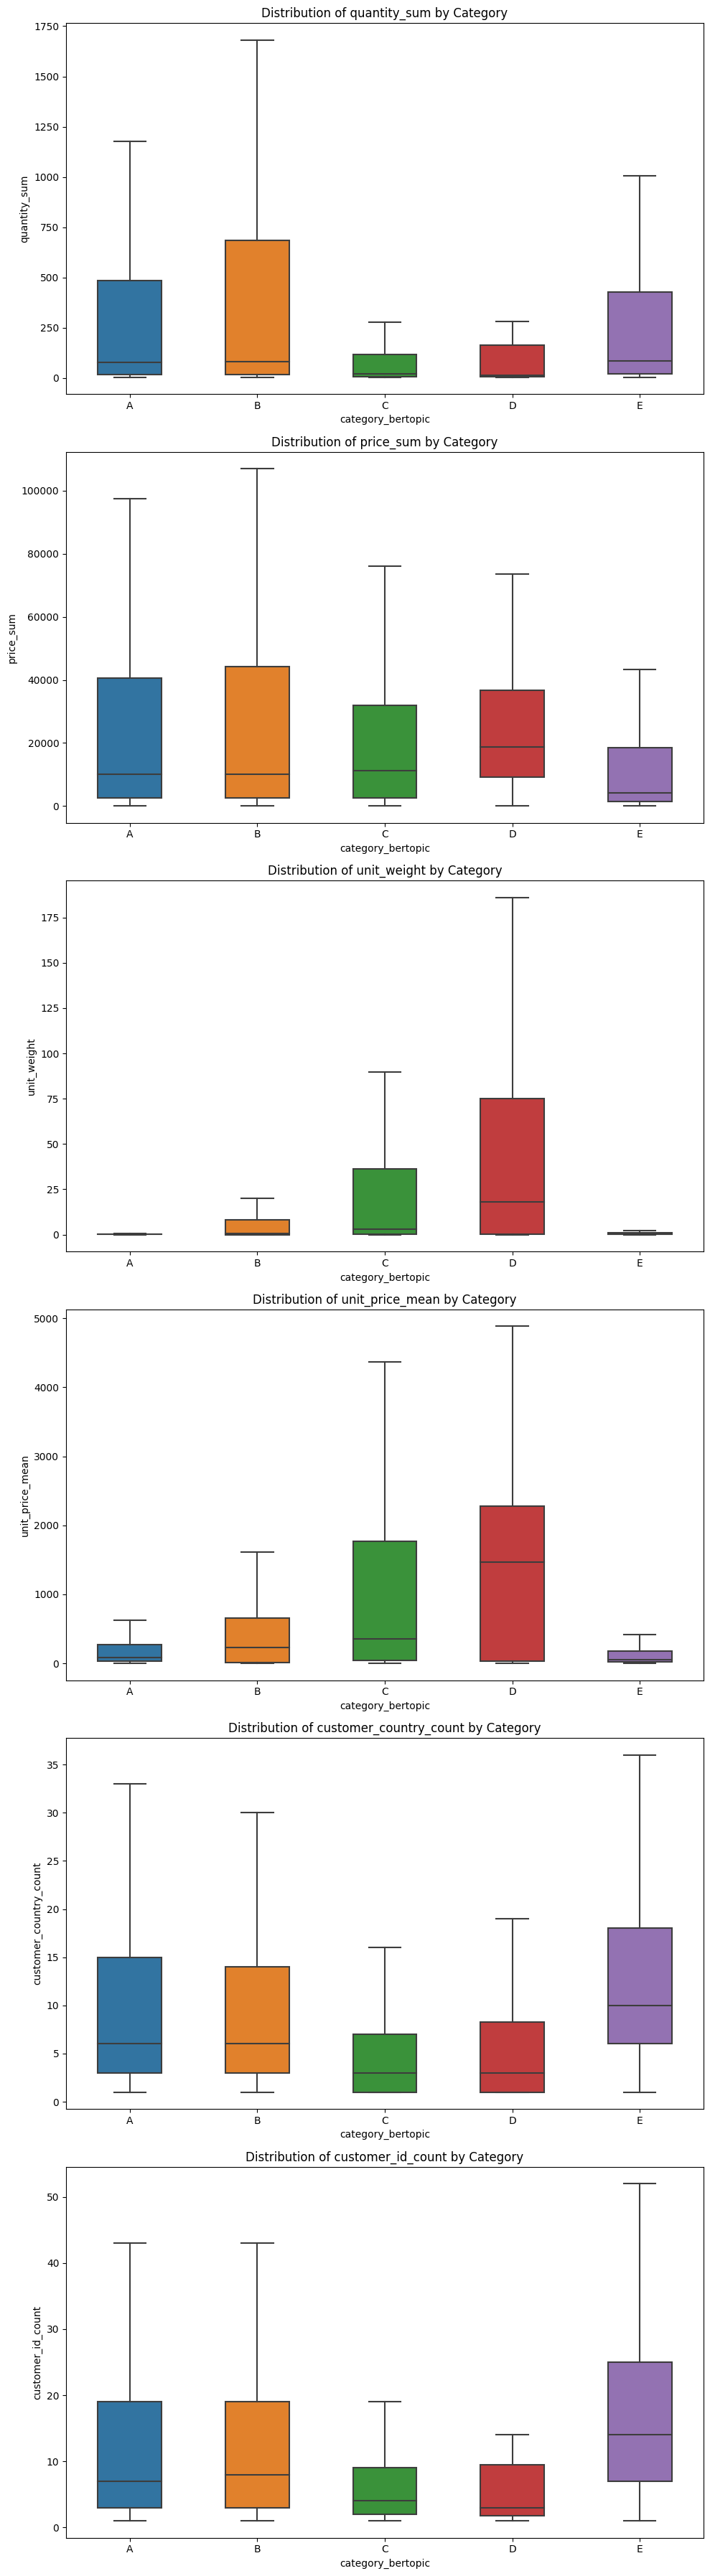

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_country_count', 'customer_id_count']

# Define the size of the entire figure
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 6 * len(numerical_features)))

# Set order for categories
order = sorted(df_bertopic_labeled['category_bertopic'].unique())

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='category_bertopic', y=feature, data=df_bertopic_labeled, width=0.5, showfliers=False, order=order, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature} by Category')
    axes[idx].set_ylabel(feature)  # Set the y-axis label for each subplot

# Adjust the layout
plt.tight_layout()

# Save the figure using your function
save_figure(fig, 'bertopic_labels_boxplot_all_num_feat')

plt.show()

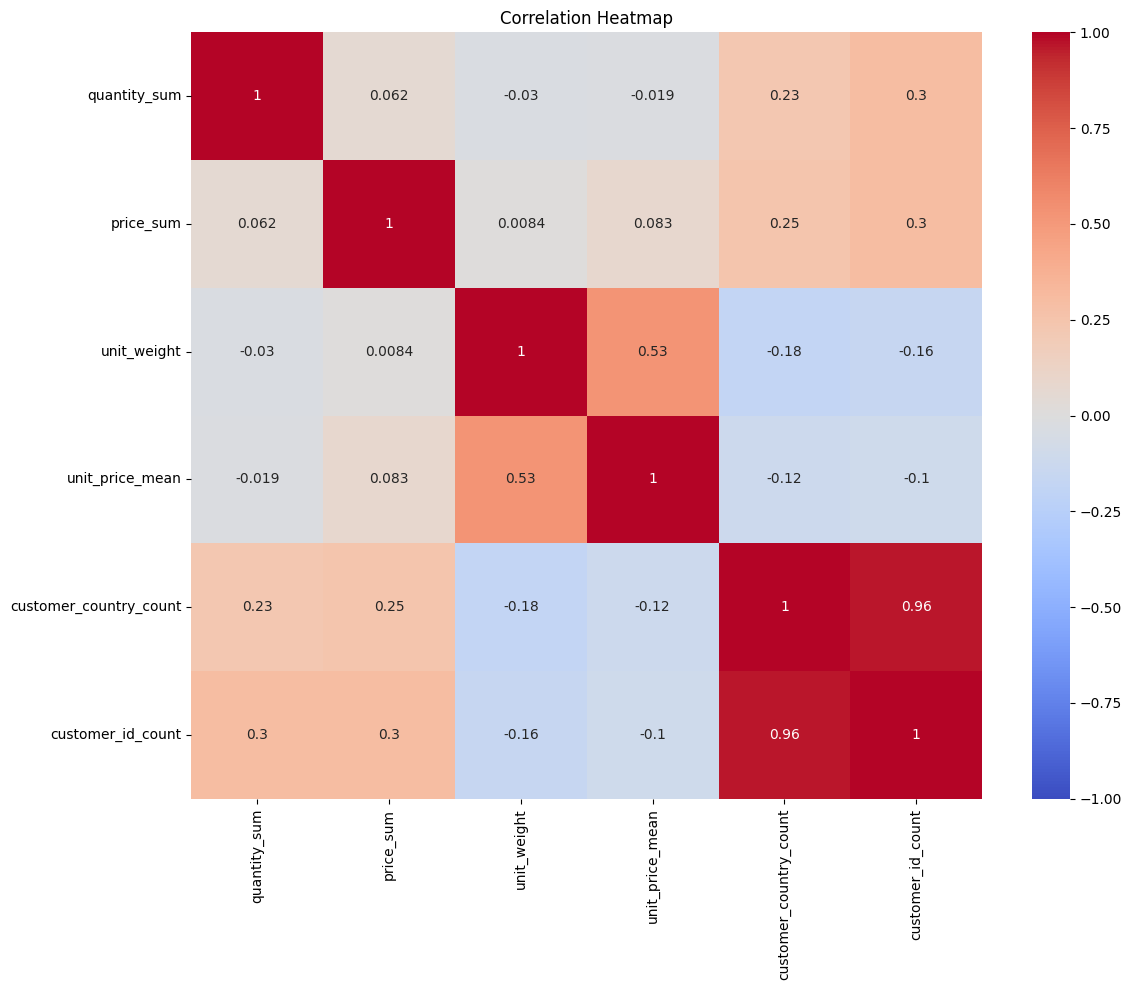

In [67]:
# Assuming you've already imported the necessary libraries and defined the save_figure function

plt.figure(figsize=(12,10))
sns.heatmap(df_bertopic_labeled[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the figure using the save_figure function
fig = plt.gcf()  # Gets the current figure
save_figure(fig, 'bertopic_labeled_corr_feat_heatmap')

plt.show()

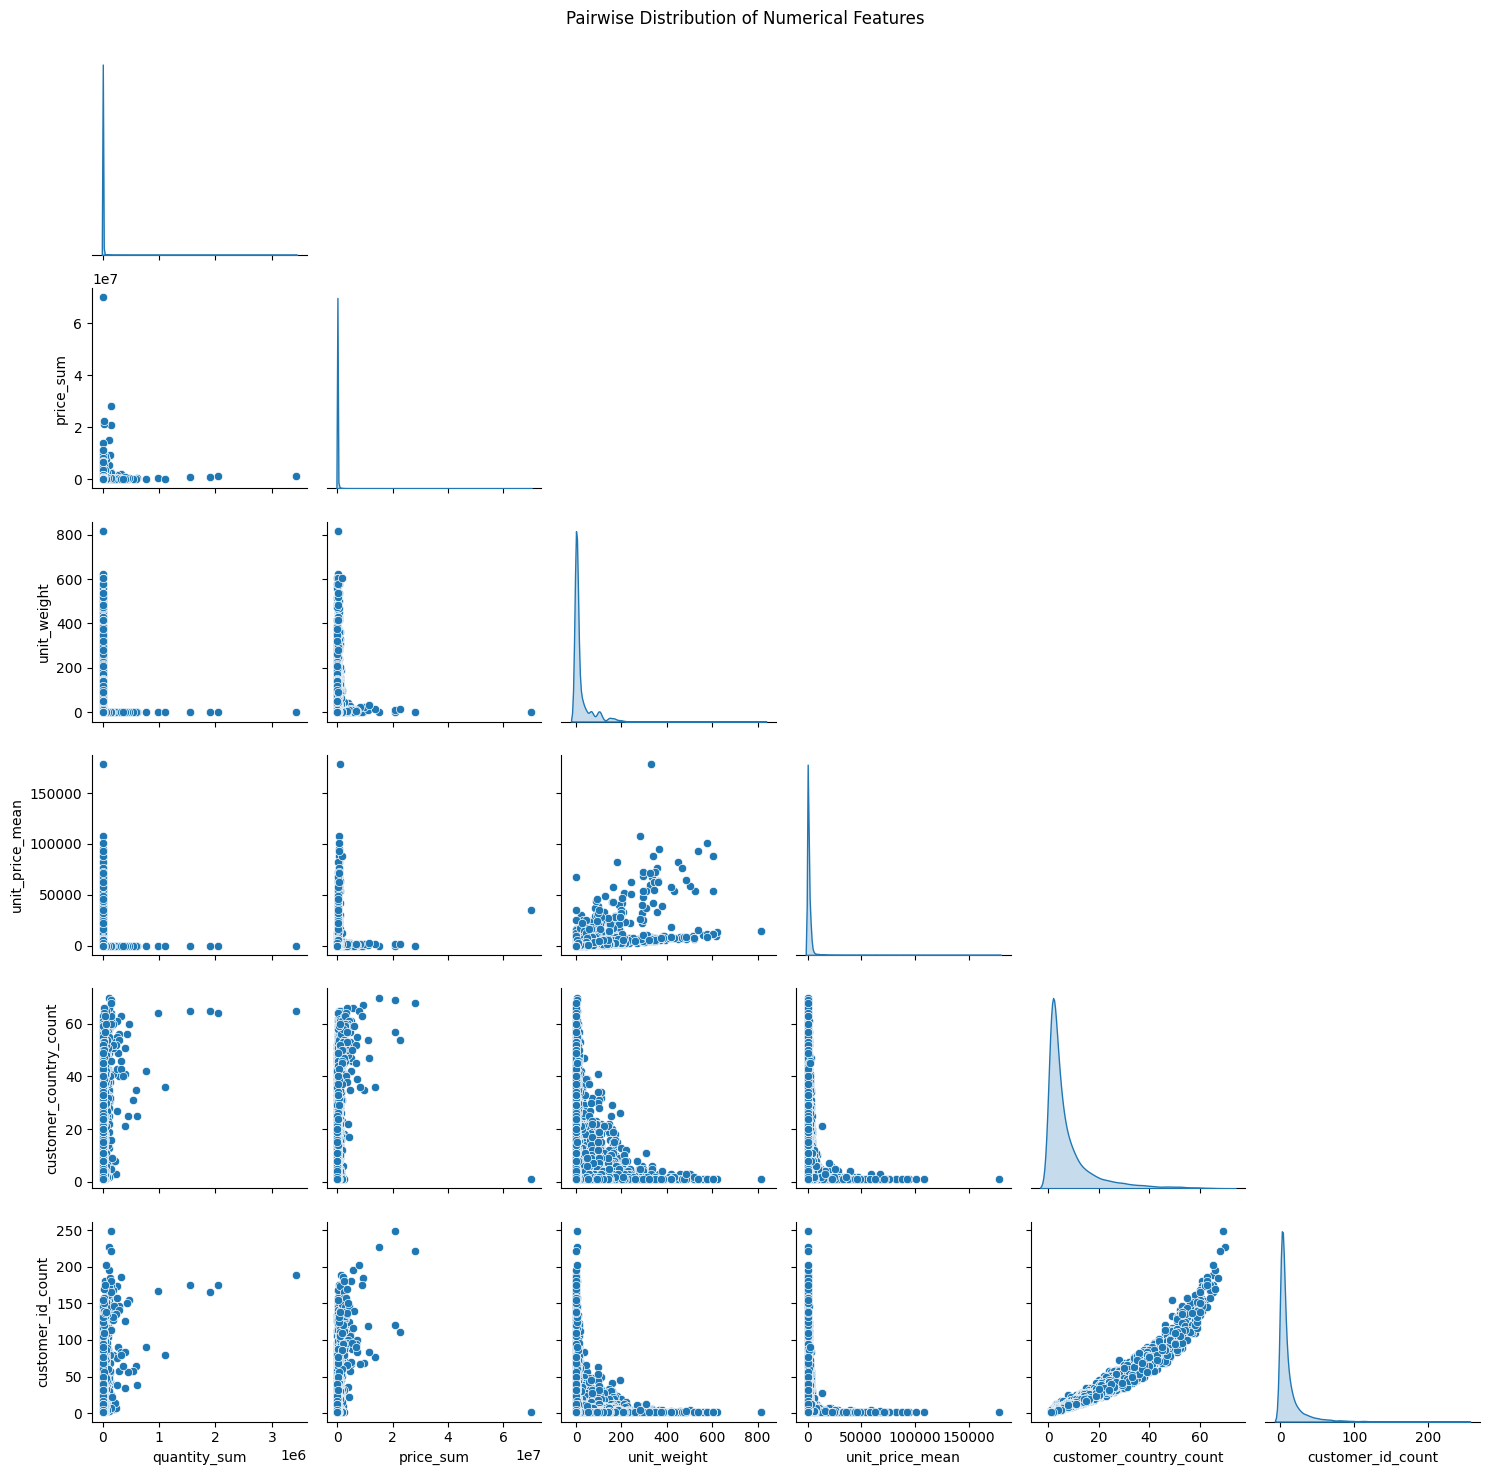

In [68]:
# Plotting pairplot
corr_plot = sns.pairplot(data=df_bertopic_labeled[numerical_features], diag_kind="kde", corner=True)

# Adjusting the layout to ensure everything fits well
plt.tight_layout()

# Add space at the top for the title
plt.subplots_adjust(top=0.95)

# Add a title above the plot using plt.suptitle()
plt.suptitle('Pairwise Distribution of Numerical Features')

# Saving the pairplot using save_figure function
save_figure(corr_plot.fig, 'bertopic_labeled_corr_dist_plot')

plt.show()


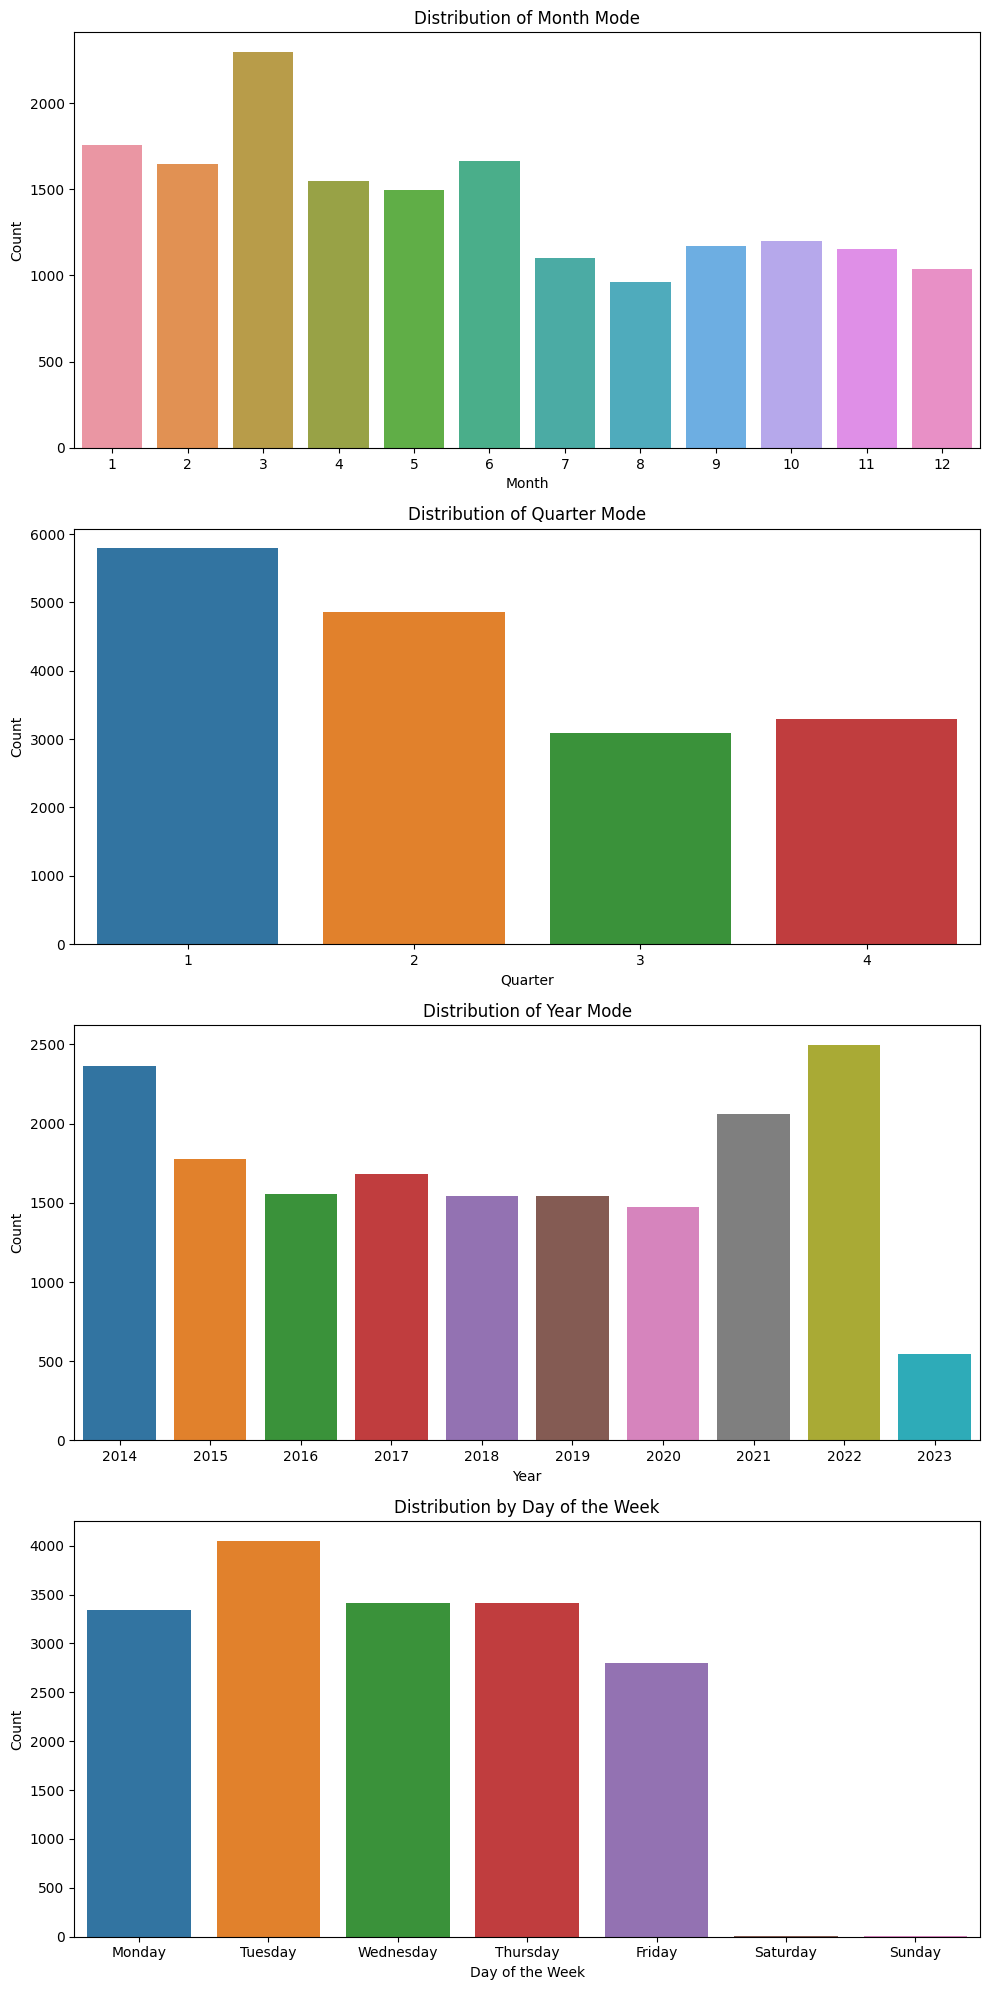

In [69]:
fig, ax = plt.subplots(4, 1, figsize=(10, 20))

# Month Mode
sns.countplot(data=df_bertopic_labeled, x='month_mode', ax=ax[0])
ax[0].set_title('Distribution of Month Mode')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Count')

# Quarter Mode
sns.countplot(data=df_bertopic_labeled, x='quarter_mode', ax=ax[1])
ax[1].set_title('Distribution of Quarter Mode')
ax[1].set_xlabel('Quarter')
ax[1].set_ylabel('Count')

# Year Mode
sns.countplot(data=df_bertopic_labeled, x='year_mode', ax=ax[2])
ax[2].set_title('Distribution of Year Mode')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Count')

# Day of the Week Mode
sns.countplot(data=df_bertopic_labeled, x='day_week_mode', ax=ax[3], order=[0, 1, 2, 3, 4, 5, 6])
ax[3].set_title('Distribution by Day of the Week')
ax[3].set_xlabel('Day of the Week')
ax[3].set_ylabel('Count')
ax[3].set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6])
ax[3].set_xticklabels(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Adjust layout
plt.tight_layout()

# Save the figure
save_figure(fig, 'bertopic_labeled_time_mode_distributions')

# Display
plt.show()


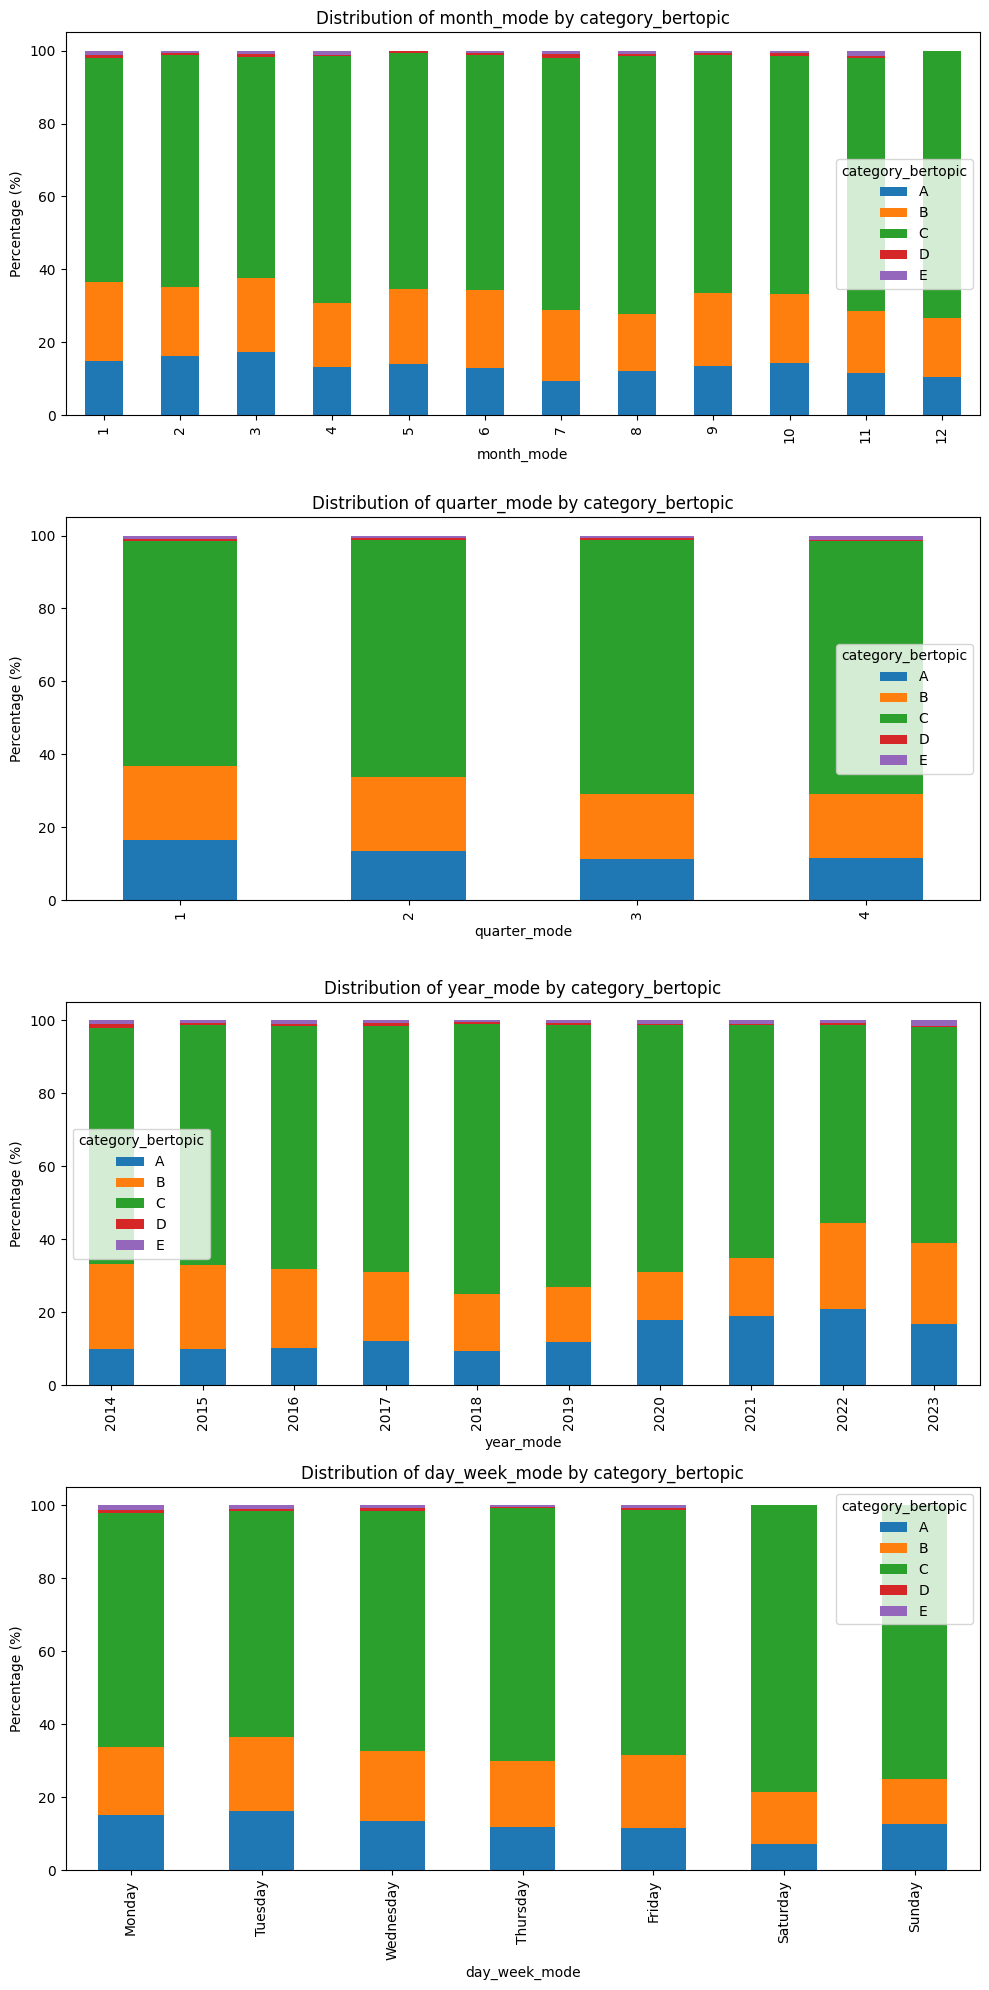

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_barchart(data, x_col, hue_col, ax, x_labels=None):
    # Calculate proportions
    ct = pd.crosstab(data[x_col], data[hue_col], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels and title
    ax.set_ylabel('Percentage (%)')
    if x_labels:
        ax.set_xticklabels(x_labels)
    ax.set_title(f'Distribution of {x_col} by {hue_col}')
    ax.legend(title=hue_col)

fig, ax = plt.subplots(4, 1, figsize=(10, 20))

# Plot stacked barcharts
plot_stacked_barchart(df_bertopic_labeled, 'month_mode', 'category_bertopic', ax[0])
plot_stacked_barchart(df_bertopic_labeled, 'quarter_mode', 'category_bertopic', ax[1])
plot_stacked_barchart(df_bertopic_labeled, 'year_mode', 'category_bertopic', ax[2])
plot_stacked_barchart(df_bertopic_labeled, 'day_week_mode', 'category_bertopic', ax[3], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


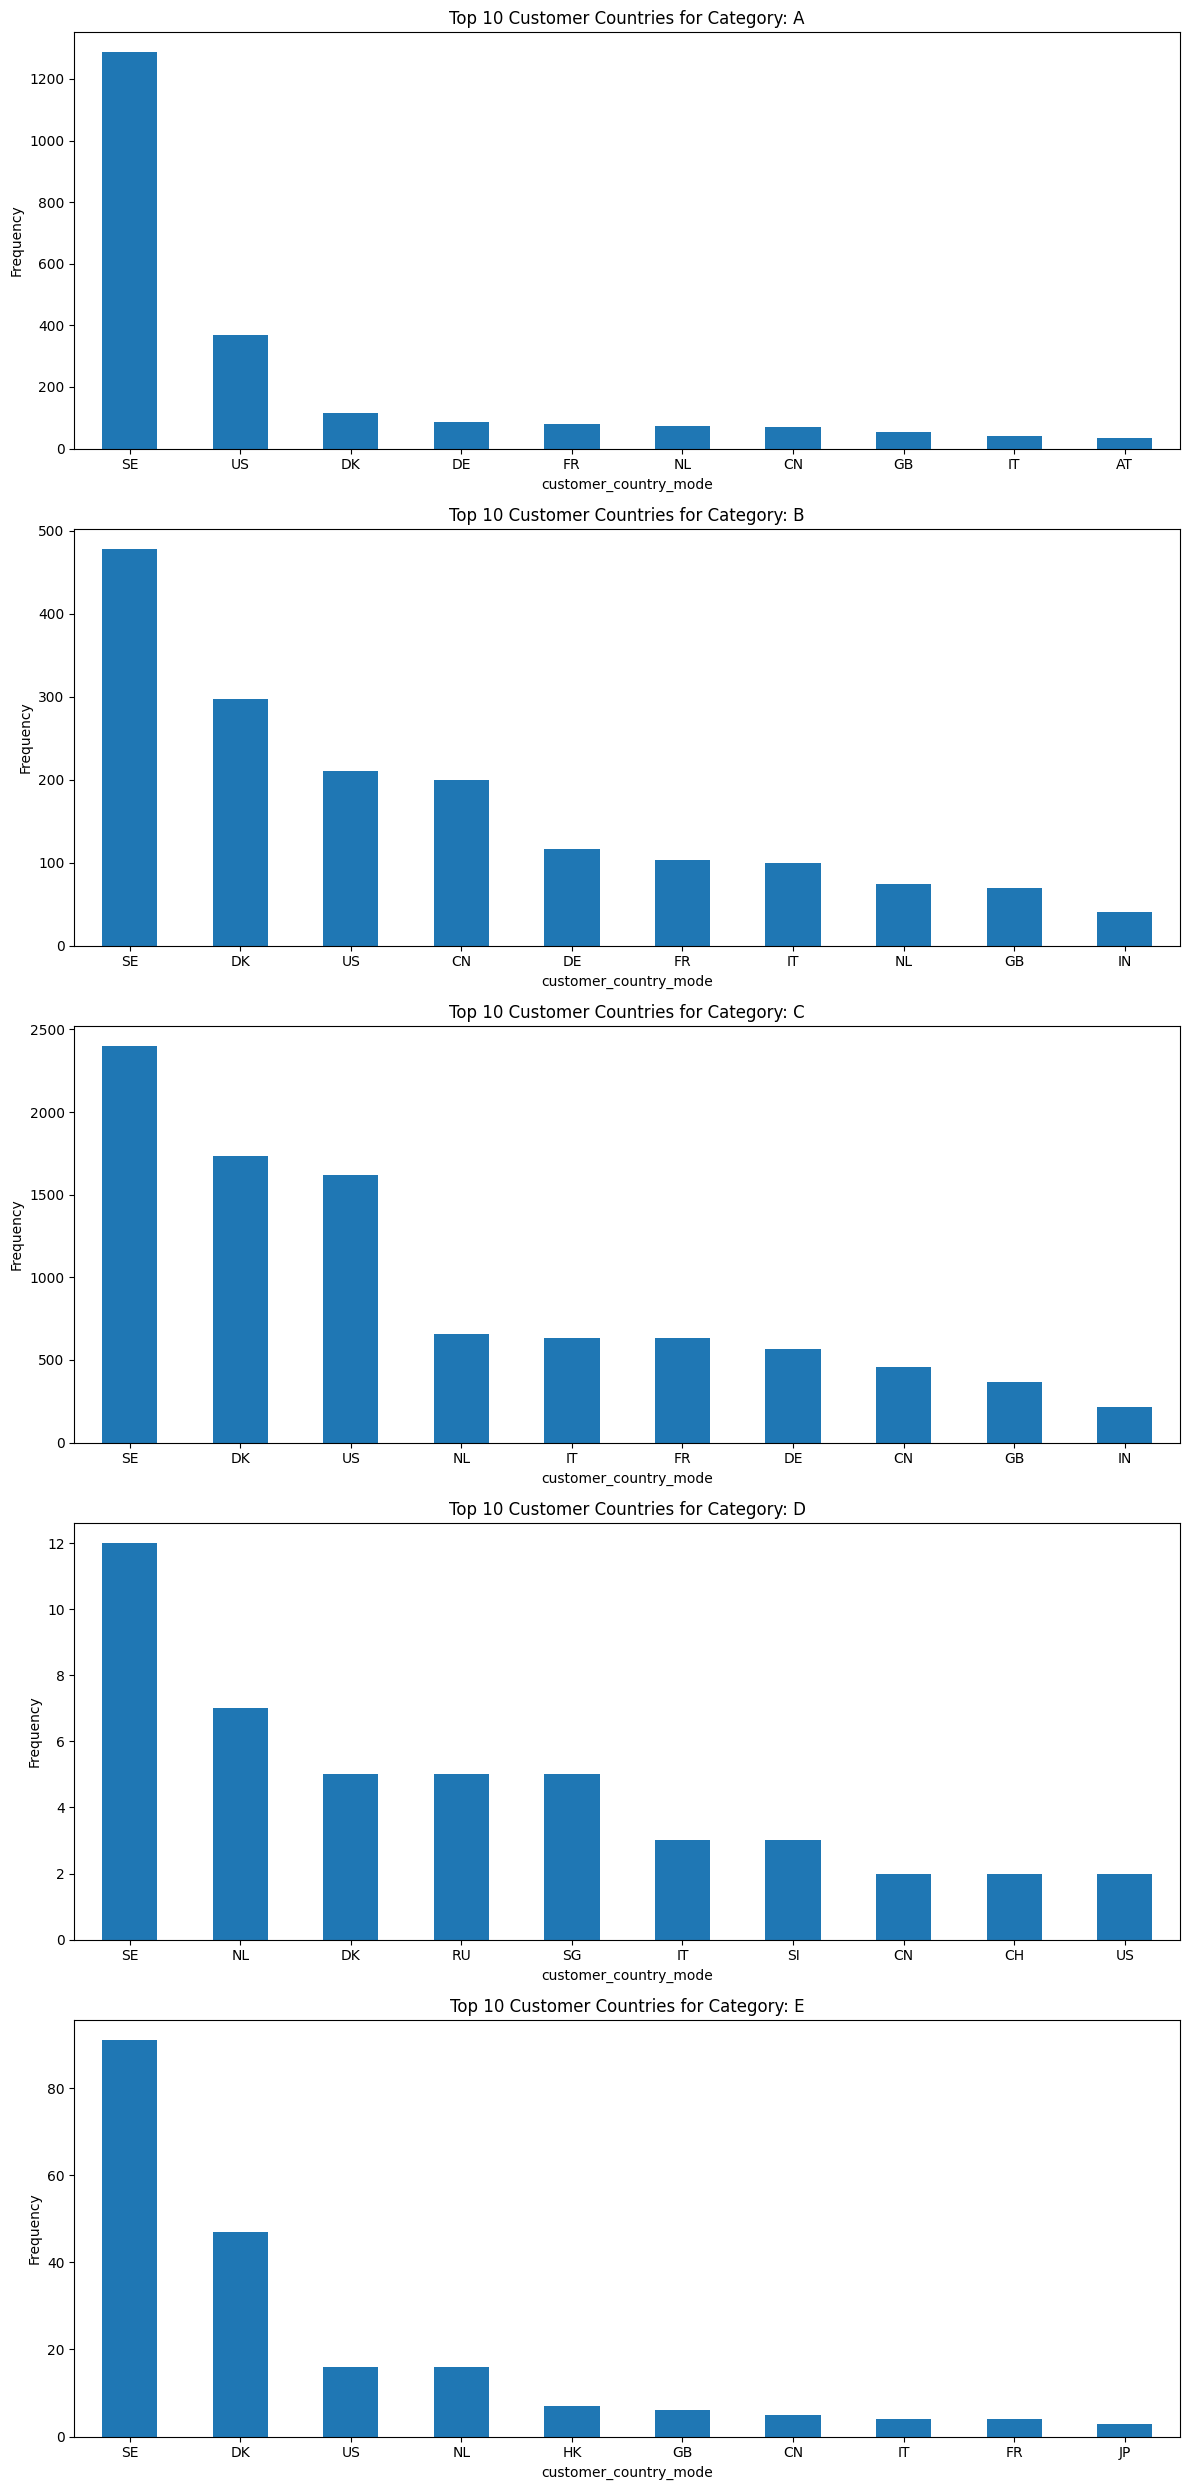

In [70]:
# Assuming 'A-E' is the desired order. If there are more categories, expand the list.
desired_order = ['A', 'B', 'C', 'D', 'E']

# Filter and sort the unique categories based on the desired order
unique_categories = [cat for cat in desired_order if cat in df_bertopic_labeled['category_bertopic'].unique()]

n_categories = len(unique_categories)

fig, axs = plt.subplots(n_categories, 1, figsize=(12, 5 * n_categories))

for ax, category in zip(axs, unique_categories):
    category_data = df_bertopic_labeled[df_bertopic_labeled['category_bertopic'] == category]
    top_countries = category_data['customer_country_mode'].value_counts().head(10)
    top_countries.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 10 Customer Countries for Category: {category}')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
save_figure(fig, 'bertopic_labeled_top_customer_countries_combined')
plt.show()

### LazyPredict

In [71]:
cat_columns = ['customer_country_mode', 'month_mode', 'year_mode', 'quarter_mode', 'day_week_mode']
num_columns = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count','customer_country_count']

In [72]:
pipeline = PreprocessingPipeline(cat_columns, num_columns)
df_transformed = pipeline.fit_transform(df_bertopic_labeled)
transformed_df_with_headers = pipeline.get_transformed_df()

Visualize transformed data - StandardScaler

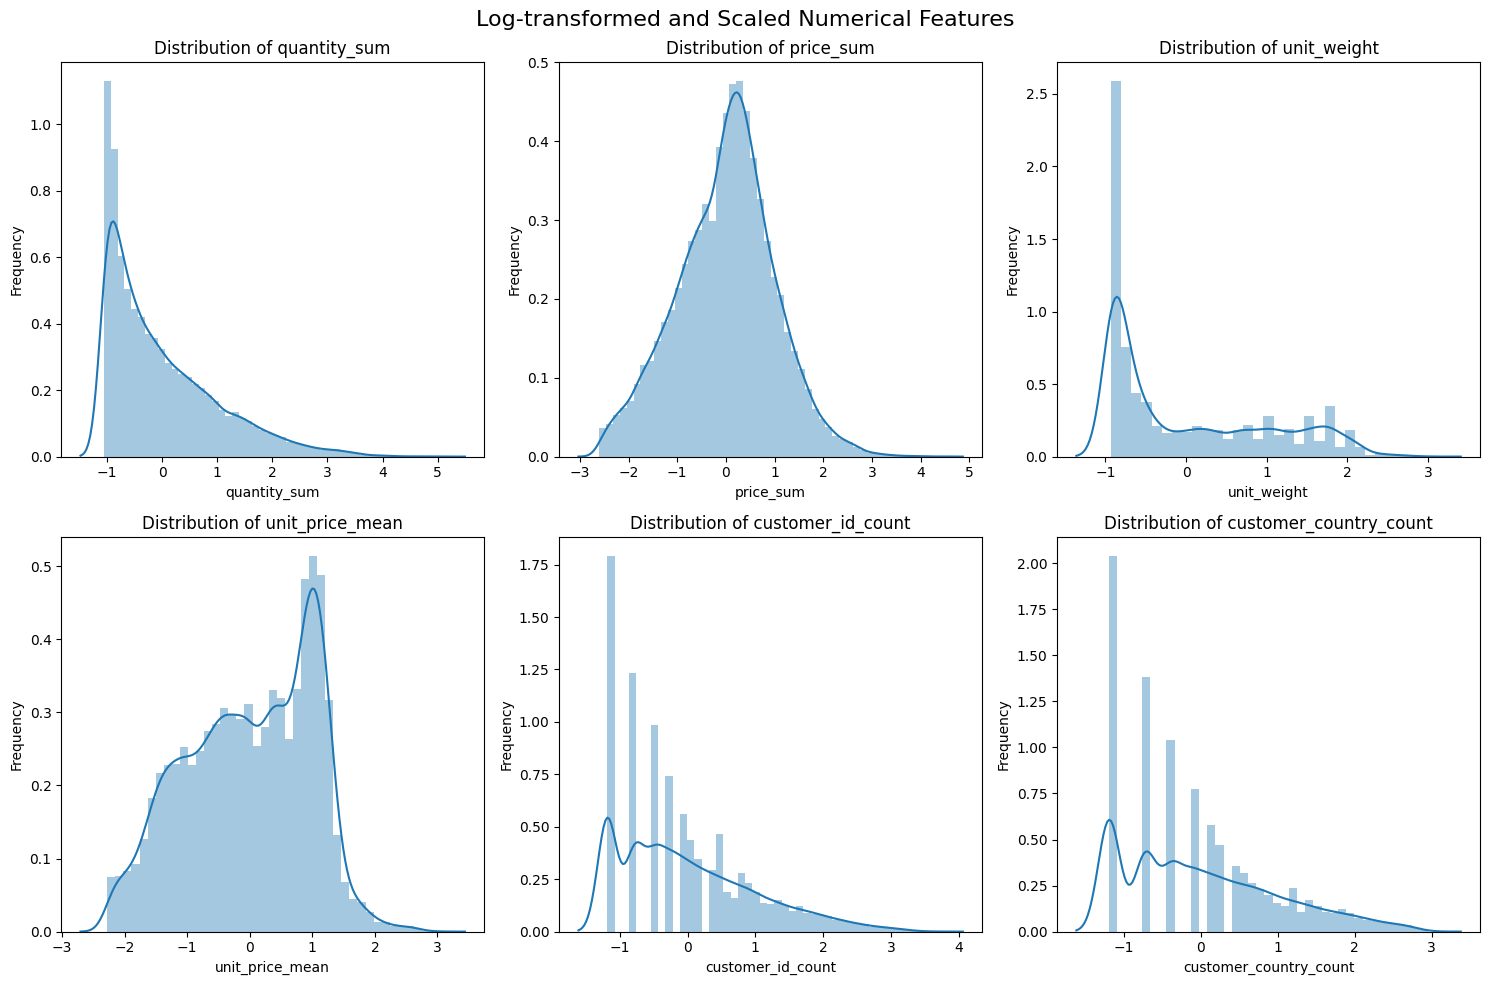

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Create subplots
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for idx, feature in enumerate(features):
    row = idx // n_cols
    col = idx % n_cols
    sns.distplot(transformed_df_with_headers[feature], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}')
    axs[row, col].set_ylabel('Frequency')

# Add a main title to the subplots
fig.suptitle('Log-transformed and Scaled Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.92)

plt.tight_layout()

# Save the figure
save_figure(fig, 'bertopic_labeled_transformed_multiple_histograms')

plt.show()


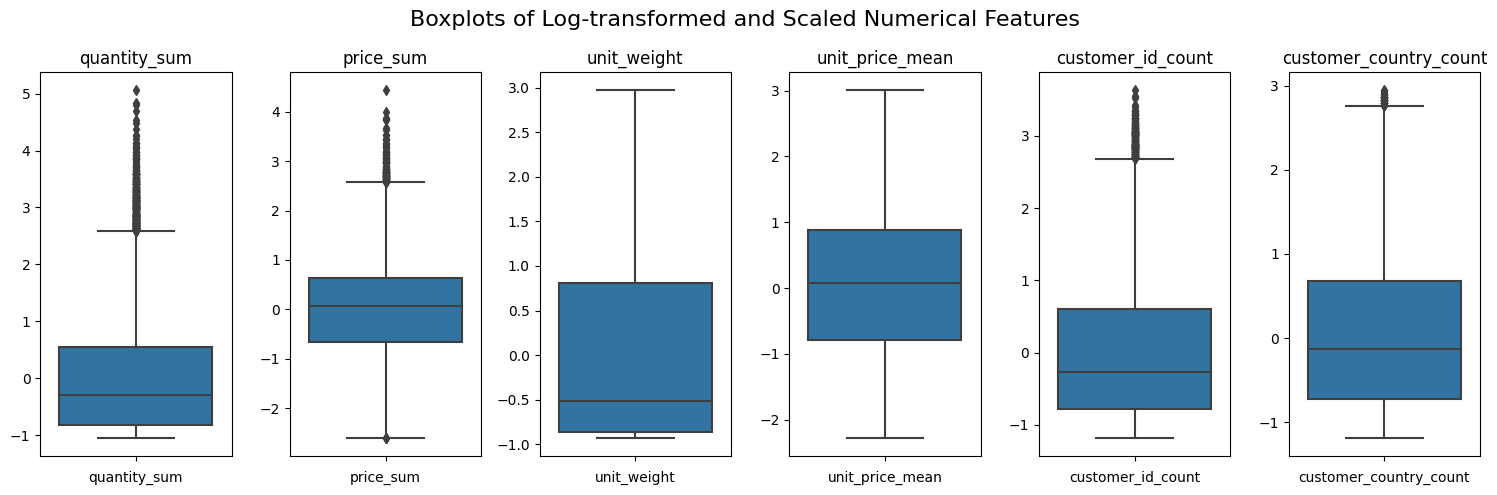

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Setting up the figure and axis
fig, axs = plt.subplots(1, len(features), figsize=(15, 5))

# Loop over each feature and plot a boxplot on its respective axis
for i, feature in enumerate(features):
    sns.boxplot(y=transformed_df_with_headers[feature], ax=axs[i])
    axs[i].set_title(f'{feature}')
    axs[i].set_ylabel('')  # To avoid repeated y-labels
    axs[i].set_xlabel(feature)

# Add a main title to the subplots
fig.suptitle('Boxplots of Log-transformed and Scaled Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.92)

plt.tight_layout()

# Save the figure
save_figure(fig, 'bertopic_labeled_transformed_multiple_boxplots')

plt.show()

In [78]:
# Run LazyPredict
lazy_pipeline = LazyPredictPipeline(df_bertopic_labeled, 'category_bertopic', cat_columns, numerical_columns=[],log_transform_columns=num_columns)
models, predictions = lazy_pipeline.run()

 90%|████████▉ | 26/29 [01:06<00:13,  4.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 13630, number of used features: 78
[LightGBM] [Info] Start training from score -1.909176
[LightGBM] [Info] Start training from score -2.141645
[LightGBM] [Info] Start training from score -0.332241
[LightGBM] [Info] Start training from score -5.648828
[LightGBM] [Info] Start training from score -4.305093


100%|██████████| 29/29 [01:08<00:00,  2.36s/it]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1349
[LightGBM] [Info] Number of data points in the train set: 10904, number of used features: 74
[LightGBM] [Info] Start training from score -1.909176
[LightGBM] [Info] Start training from score -2.141489
[LightGBM] [Info] Start training from score -0.332317
[LightGBM] [Info] Start training from score -5.659299
[LightGBM] [Info] Start training from score -4.299673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 10904, number of used features: 74
[LightGBM] [Info] Start training from score -1.909176
[LightGBM] [Info] Start training f

In [79]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,Cross_Val_Score
Model,,,,,,
LGBMClassifier,0.82,0.45,None,0.80,1.70,0.81
BaggingClassifier,0.80,0.42,None,0.79,0.81,0.79
DecisionTreeClassifier,0.74,0.40,None,0.74,0.21,0.74
RandomForestClassifier,0.80,0.36,None,0.76,1.35,0.79
ExtraTreesClassifier,0.77,0.35,None,0.73,1.20,0.76
NearestCentroid,0.49,0.34,None,0.56,0.11,0.25
LabelPropagation,0.63,0.33,None,0.64,3.07,0.68
LabelSpreading,0.63,0.33,None,0.64,7.28,0.69
LinearDiscriminantAnalysis,0.75,0.33,None,0.71,0.64,0.74
